#### Realisation d'une ACP en python

In [202]:
# Import packages
!pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import numpy as np # Module pour les calculs numeriques
import sklearn.decomposition as PCA # module de la librairie Scikit-learn, tres populaire pour faire du machine learning
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [203]:
# Importation du dataframe

df=sns.load_dataset("iris")
# Afficher  les premieres lignes du tableau
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [209]:
# Analyse de la dimension de la base de données
df.shape

(150, 5)

In [215]:
# Analyse du type de variable dans la base de données
df.dtypes
# Les floats sont des nmbres continus avec des virgules

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [216]:
# Analyse des données manquantes
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# 2 Analyse descriptives univariés

In [227]:
# Analyse descriptive du jeu de données
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [238]:
# Description des variables qualitatives
df.describe(include="object")

,species
count,150
unique,3
top,setosa
freq,50


<Axes: >

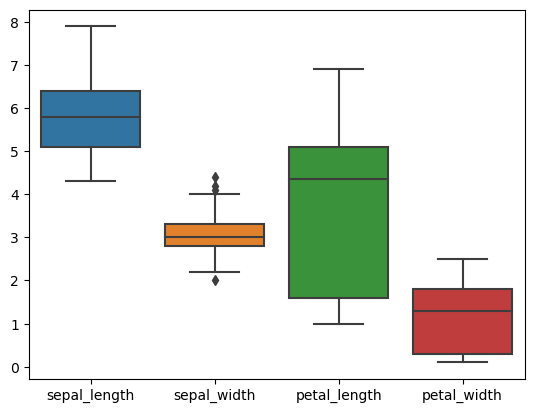

In [240]:
# Analyse descriptives des variables quantitatives
sns.boxplot(data=df)

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


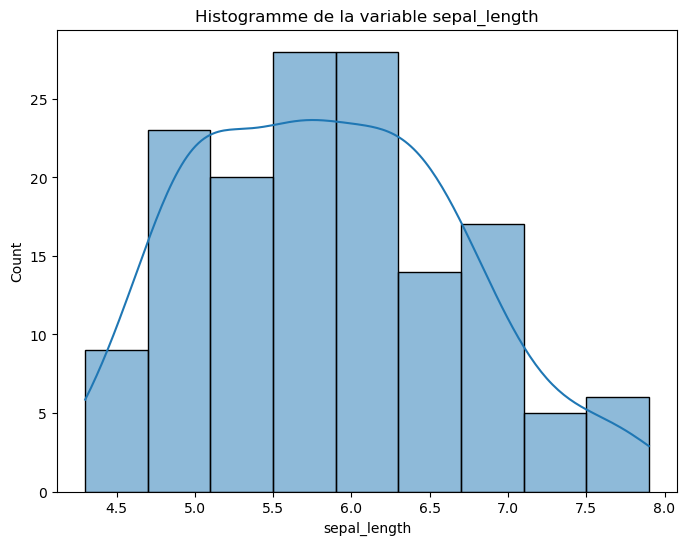

La variable sepal_length suit une loi normale (p-value=0.0568)


C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


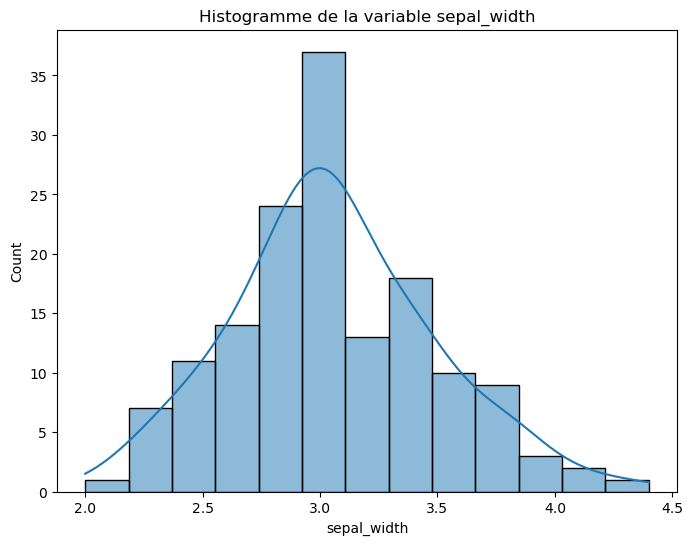

La variable sepal_width suit une loi normale (p-value=0.2097)


C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


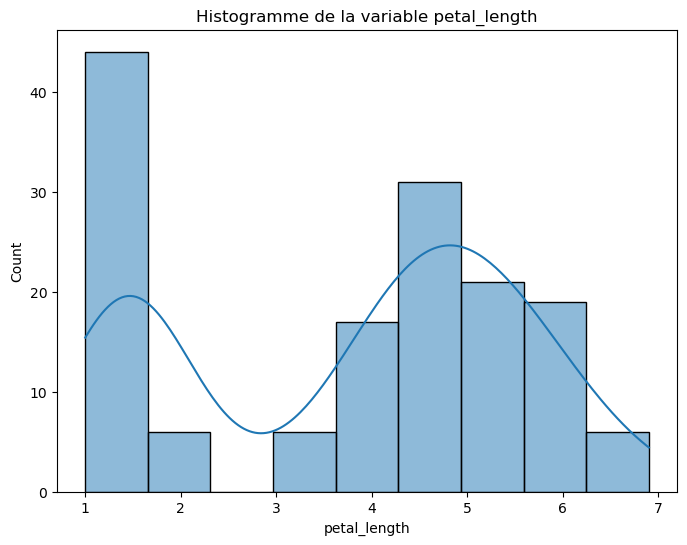

La variable petal_length ne suit pas une loi normale (p-value=0.0000)


C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


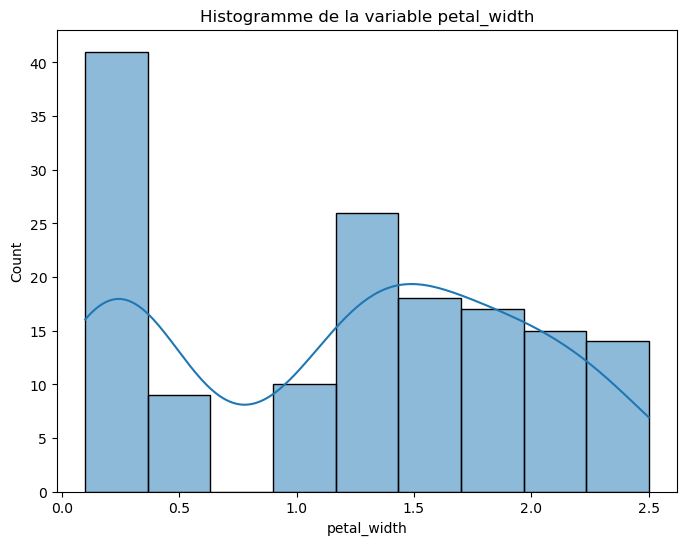

La variable petal_width ne suit pas une loi normale (p-value=0.0000)


In [241]:
# Remarques : Il n'y a pas trop de valeurs extremes, excepté sepal_width qui presente quelque valeurs extremes
# Pour faire un travail serieux, il faut prendre le temps d'identifier les valeurs extremes : (comme methode classique, on a :
# l'IQR et le z-score

# Analyse de la normalité avec le test de shapiro : (pour faire les test parametriques, il faut que la serie soit normalement distribué)

# Creation d'un histogramme et d'un test de normalité pour chaque variable 

# Boucle sur chaque colonne sauf la dernière
for column in df.columns[:-1]:
    # Création de l'histogramme avec une courbe de densité (KDE)
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    # Test de normalité
    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value:.4f})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value:.4f})")


<Axes: xlabel='species', ylabel='count'>

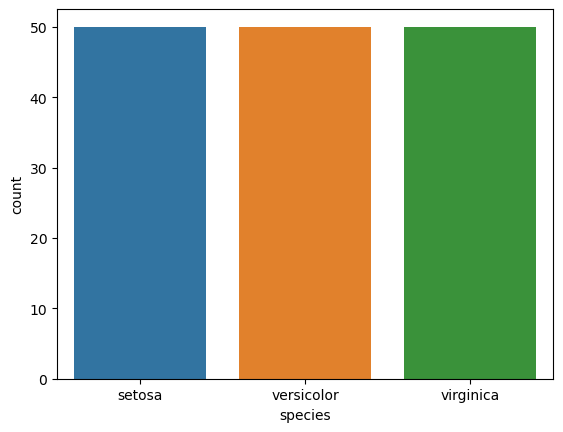

In [242]:
# Analyse des variables qualitatives
sns.countplot(x=df['species'])

([<matplotlib.patches.Wedge at 0x248564efa50>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')])

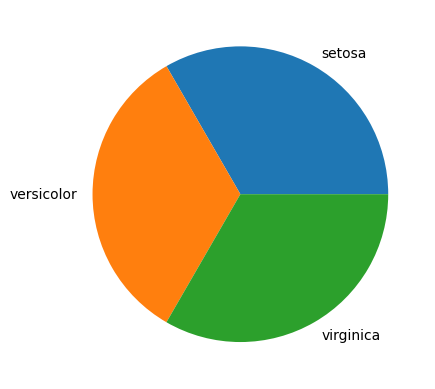

In [243]:
# Creation d'un tableau de fréquences pour la variable "species"
freq_table = (df['species'].value_counts())/len(df)
freq_table

# Cration d'un diagramme circulaire pour le tableau de frequence
plt.pie(freq_table, labels=freq_table.index)

In [244]:
# NB: on ne peut pas de test parametrique sur la longueur et la variable du petal car ces deux variables e sont pas normalement distribués

#### 3 Analyses bivariées

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

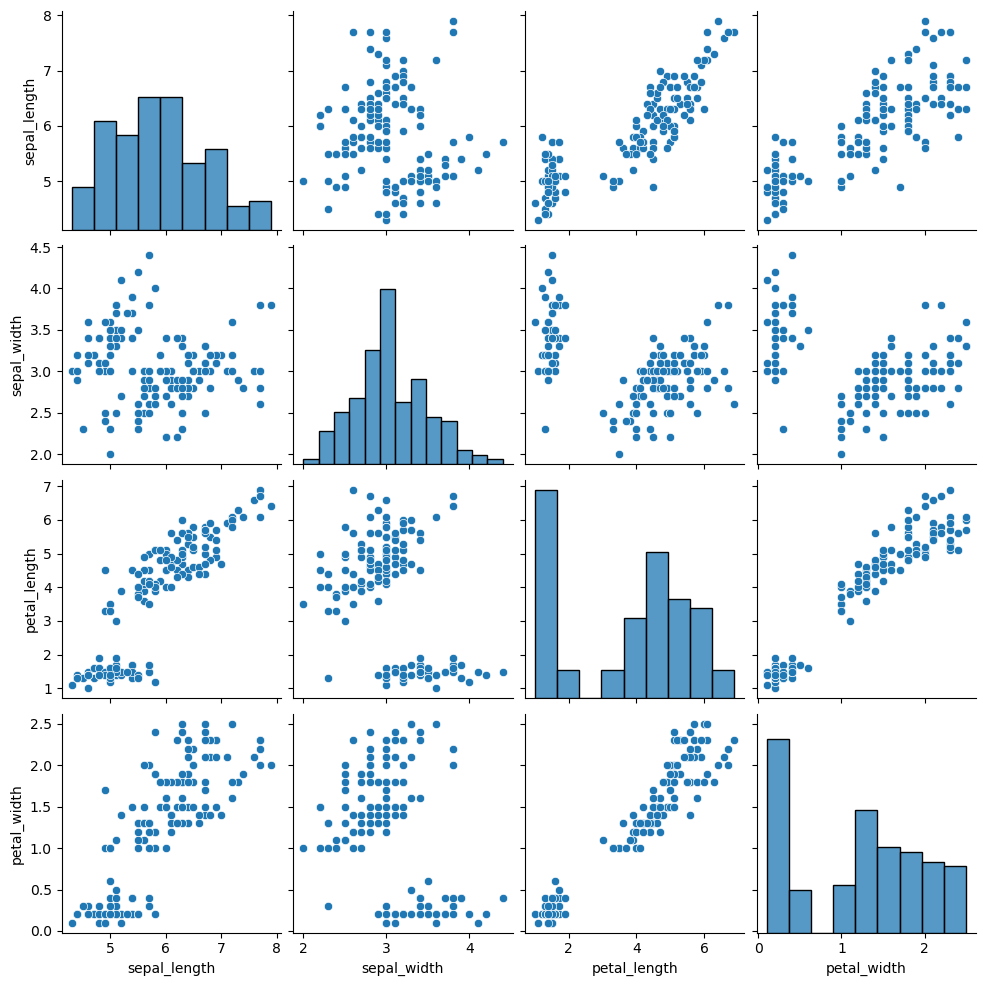

In [246]:
# Relation entre les variables quantitatives
sns.pairplot(df)

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

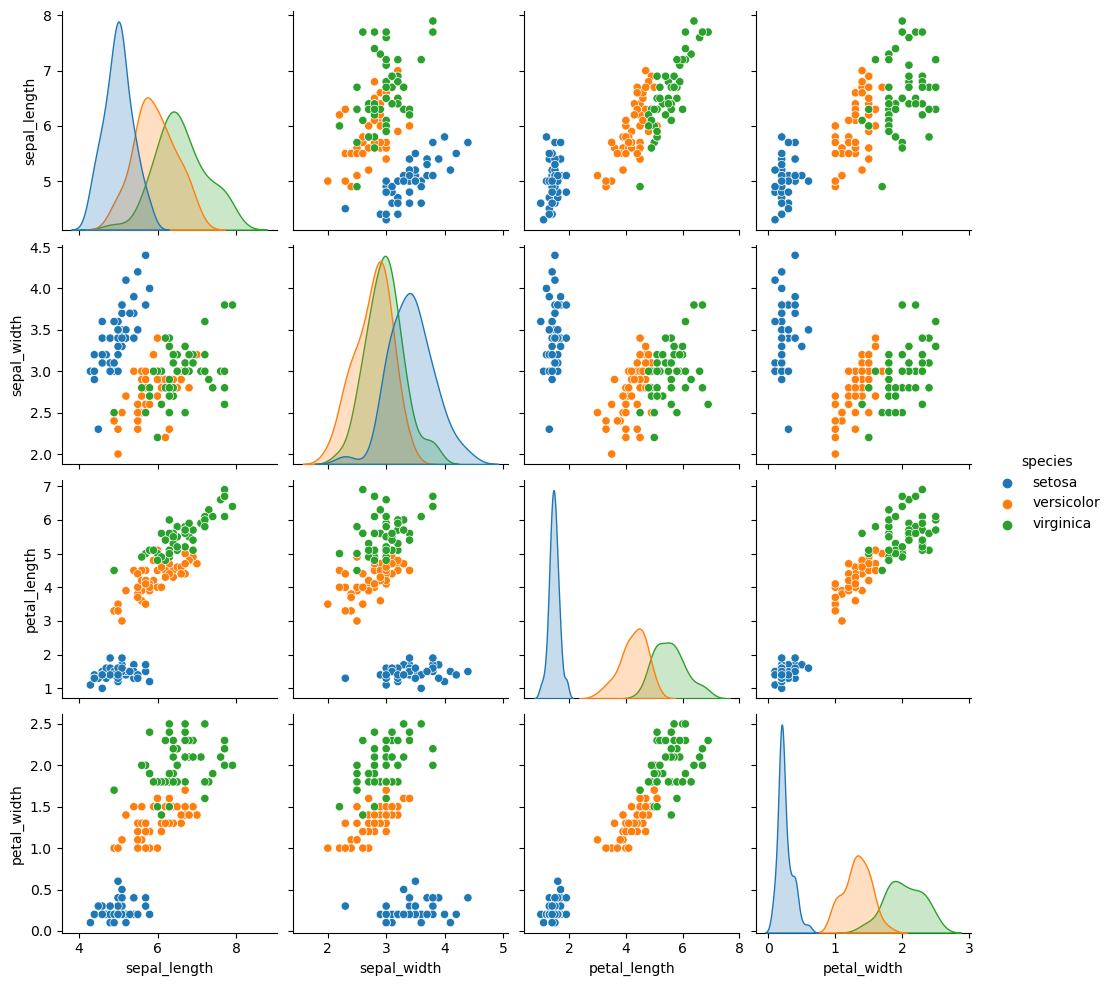

In [247]:
# pairplot
p=sns.pairplot(df, hue = 'species')

In [248]:
# On peut voir comment les variables evoluent, on a par exemple une relation lineaire entre la largeur et la longueuur du petal

<Axes: >

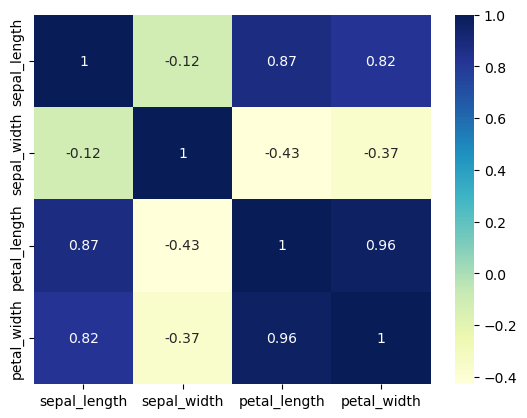

In [261]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Obtenir le tableau de correlation et la heatmap
corr_matrix = numeric_df.corr()

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

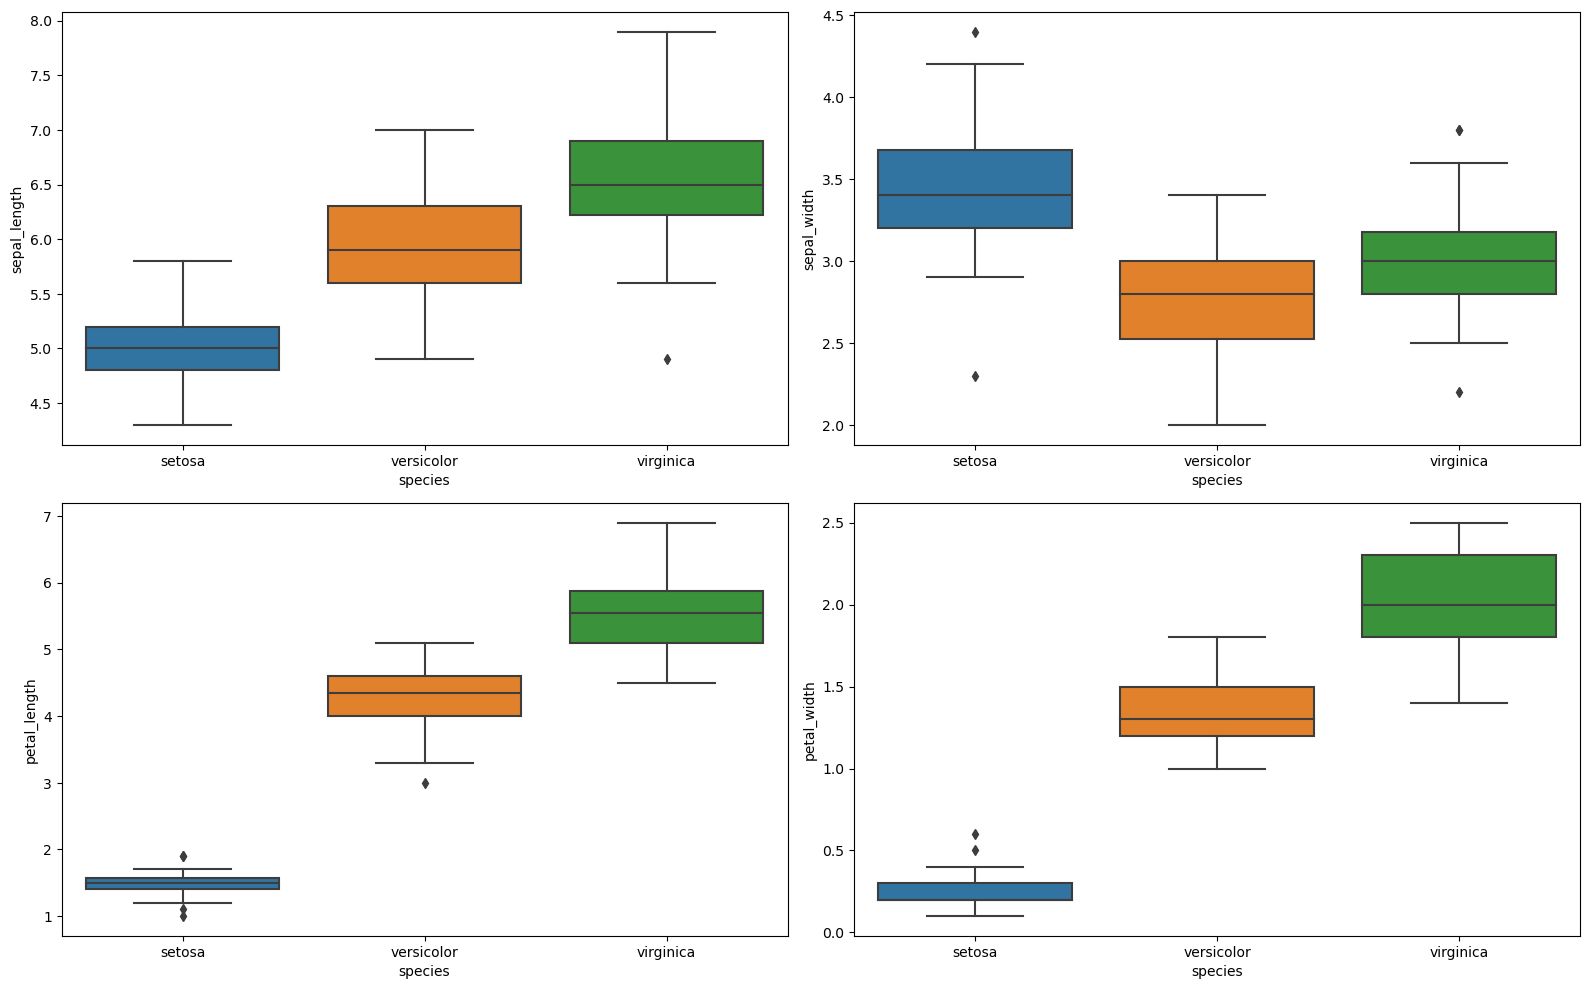

In [262]:
# l'heatmap confirme qu'il y'a une forte liaison entre la longueur et la largeur du petal (la corr=0.96)
# A partir de 0.60, on considere que la correlation est forte

#Analyse des relations entre les variables et la variété de fleur

# Création des boxplots pour chaque variable en fonction de l'espèce de la fleur
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10)) # plt.subplots : Crée une figure (fig) et une grille de sous-graphiques (ax).

# fig : La figure principale qui contient tous les sous-graphiques.
# ax : Un tableau (array) 2D de dimensions (2, 2) contenant les axes (sous-graphiques) pour chaque case de la grille.

row = 0
col = 0
for i in range(len(df.columns) -1):
    """
    pour les colonnes i = 0 et 1, rien ne se passe. on reste en row=0 c'est à dire en premiere ligne et lorsque le nbre de colonne est > à 1,
    on passe à la ligne 2
    """
    if col > 1: # Si la colonne actuelle dépasse 1 (on est à la 3e colonne, hors de la grille)
        row += 1 # On passe à la ligne suivante
        col = 0 # # On remet la colonne à 0 pour repartir du début de la nouvelle ligne
    axes = ax[row,col] # Sélectionne le sous-graphique (axe) correspondant à la position actuelle (row, col) dans la grille.
    sns.boxplot(x = df['species'], y = df[df.columns[i]],ax = axes)
    col += 1 # On incrémente la colonne (col) pour passer à la colonne suivante dans la grille.
plt.tight_layout() # Ajuste automatiquement l'espacement entre les sous-graphiques pour éviter les chevauchements de titres, étiquettes, etc.
# plt.title("Individual Features by Class")
plt.show()

In [263]:
# On constate par exemple que les fleurs virginica ont de long petal et de long sepal
# Ils ont egalement de large petal
# pour la largeur des sepal, on constate que les fleurs setosa ont de plus grande largeur

# Il faut maintenant confirmer cela par un test statistique, comme on a trois modalités, on va se diriger vers un test de kruskal wallis car on a vu
# que la normalite n'etait pas verifié pour trois variables

# Confirmation des liaisons avec un test de kruskal-wallis (test non parametrique) pour chaque variable

for column in df.columns[:-1]: # Parcourt toutes les colonnes du DataFrame sauf la dernière.
    _, p_value = stats.kruskal(*[df[column][df.species == species] for species in df.species.unique()])
    # _, p_value : Le test de Kruskal-Wallis retourne deux valeurs : la statistique de test (_, ignorée ici) et la p-value (p_value).
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les especes (p-values={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les especes (p-values={p_value})")

La variable sepal_length est significativement différente entre les especes (p-values=8.91873433246198e-22)
La variable sepal_width est significativement différente entre les especes (p-values=1.5692820940316782e-14)
La variable petal_length est significativement différente entre les especes (p-values=4.803973591157605e-29)
La variable petal_width est significativement différente entre les especes (p-values=3.261795552421968e-29)


#### 4. Analyse multivariée avec l'ACP

#### 4.1 Construction de l'ACP

In [270]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [271]:
# Separation des données en variables explicatives (X) et variable qualitative (Y)

# Ces lignes de code servent à séparer les données en variables explicatives (X) et variable cible (Y), souvent utilisé en machine learning pour 
# l'entraînement d'un modèle.
# iloc est utilisé pour la sélection basée sur l'indexation (position des colonnes).

X = df.iloc[:, :-1].values # On prend toutes les lignes et toutes les colonnes sauf la derniere colonne
# Les colonnes sélectionnées correspondent aux variables explicatives (ou features).

# .values convertit le résultat en tableau NumPy (ndarray), ce qui est souvent nécessaire pour les modèles d’apprentissage automatique.

# Variable qualitative

Y = df.iloc[:, -1].values # prends toutes les lignes et sélectionne la dernière colonne du dataset.
# Y contient les étiquettes de classe (ex: nom d’une fleur) ou valeurs à prédire.



In [276]:
# Standardisation des données
# Normaliser les données ("pour eviter l'effet taille")
scaler = StandardScaler() # c'est une classe
X_scaled = scaler.fit_transform(X) # permet de transformer en variable normalisée

In [278]:
# Reduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X)

#### 4.2 Aide à l'interpretation

In [281]:
# Analyse des valeurs propres

# Construction d'un dataframe
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.228242,92.0,92.0
1,Dim2,0.242671,5.0,98.0
2,Dim3,0.078210,2.0,99.0
3,Dim4,0.023835,1.0,100.0


Text(3.25, 26, '25%')

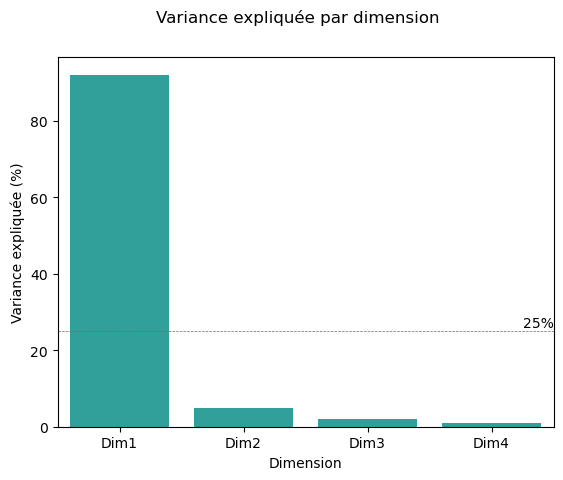

In [283]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension",
                     y = "% variance expliquée",
                     palette = ["lightseagreen"],
                     data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100/4 (nb dimensions)
plt.text(3.25, 26, "25%")


#### Qualité de représentation des variables et contribution à la formation des axes

**Qualité de représentation des variables (cosinus carré):**
- La qualité de représentation des variables est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les variables et les axes principaux. 
- Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

**Contribution des variables à la formation des axes (CTR):**
- La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour expliquer la variabilité des données sur un axe principal donné.
- Il est important de noter que la somme des contributions des variables sur un axe principal donné est égale à 100 %.
En interprétant les contributions des variable à la formation des axes, il est courant de considérer les variables ayant une contribution supérieure à la contribution moyenne (100 % / nombre de variables) comme étant importantes pour la formation de l'axe principal considéré.



In [292]:
# Calcul du cosinus carré des variables

cos_squared = np.square(pca.components_)

# Creation d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df.columns[:-1] # pour designer les noms des lignes qui seront egales au nom de la derniere colonne

print(df_cos_squared)

                   PC1       PC2       PC3       PC4
sepal_length  0.130600  0.007144  0.733885  0.128371
sepal_width   0.431109  0.533136  0.030058  0.005697
petal_length  0.338759  0.357497  0.005812  0.297932
petal_width   0.099532  0.102223  0.230245  0.568000


In [288]:
# Interpretation : PC1 + PC2 represente le premier axe factoriel
# Ici nous avons considéré que deux axes
# la variable sepal_width et petal_length sont par exemple bien représentées sur les deux premiers axes factoriel
# certaines variables sont bien representées sur les autres axes -mais ici, on ne s'interesse qu'aux deux premiers axes factoriels)

In [193]:
# Contribution à la formation de l'axe 

##  Pour comparer les contributions absolues (brutes donc non normalisées) des variables à la variance expliquée par chaque 
##  composante principale.


# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
# X.shape renvoie un tuple de la forme (nombre_de_lignes, nombre_de_colonnes), c'est-à-dire (n_samples, n_features).
# X.shape[1] extrait le deuxième élément du tuple, soit le nombre de colonnes (nombre de variables explicatives).

features_names=df.columns[0:4]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) *eigenvalues

# Creer un Dataframe pour faciliter l'affichage des resultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=features_names)

print(variable_contrib_df)

              PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
sepal_length     0.552210     0.104617     0.026494     0.002372
sepal_width      0.030207     0.129376     0.027960     0.002436
petal_length     3.103041     0.007294     0.000455     0.005488
petal_width      0.542784     0.001383     0.023301     0.013538


In [290]:
# Contribution des variables à la formation des axes
##  Pour comparer les contributions relatives en pourcentage ( donc normalisées) des variables à la variance 
# expliquée par chaque composante principale.

components = pca.components_
n_components = X.shape[1]
features_names=df.columns[0:4]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T # Matrice des coefficients (n_features, n_components)
eigenvalues = pca.explained_variance_ # # Valeurs propres (n_components,)
variable_contributions = (loadings**2) * eigenvalues # (n_features, n_components)

# Convertir les contributions en pourcentage
variable_contrib_percent = (variable_contributions / eigenvalues) * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=features_names)

print(variable_contrib_df)


              PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
sepal_length    13.060027    43.110881    33.875875     9.953217
sepal_width      0.714406    53.313572    35.749736    10.222286
petal_length    73.388453     3.005808     0.581194    23.024545
petal_width     12.837115     0.569738    29.793195    56.799951


#### Qualité de représentation des individus et contribution à la formation des axes
Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des individus sur les axes principaux et leur contribution à la formation de ces axes.
- **Qualité de représentation des individus (cosinus carré)**
- **Contribution des individus à la formation des axes (CTR)**

En interprétant les contributions des individus à la formation des axes, il est courant de considérer les individus ayant une contribution supérieure à la contribution moyenne (100 % / nombre d'individus) comme étant importants pour la formation de l'axe principal considéré.


In [197]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

     PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
0       1.135938     0.280255     0.006642     0.000143
1       1.161486     0.086068     0.377577     0.274281
2       1.315955     0.057720     0.002731     0.011153
3       1.188344     0.278331     0.008490     0.159756
4       1.173994     0.293315     0.069167     0.104961
..           ...          ...          ...          ...
145     0.595923     0.096615     0.269548     5.080547
146     0.367724     0.386979     0.126661     1.809735
147     0.490813     0.017084     0.145127     0.524978
148     0.569753     0.037368     4.458903     0.055625
149     0.304717     0.219494     1.122655     0.672313

[150 rows x 4 columns]


#### 5. Representation graphique et interpretation

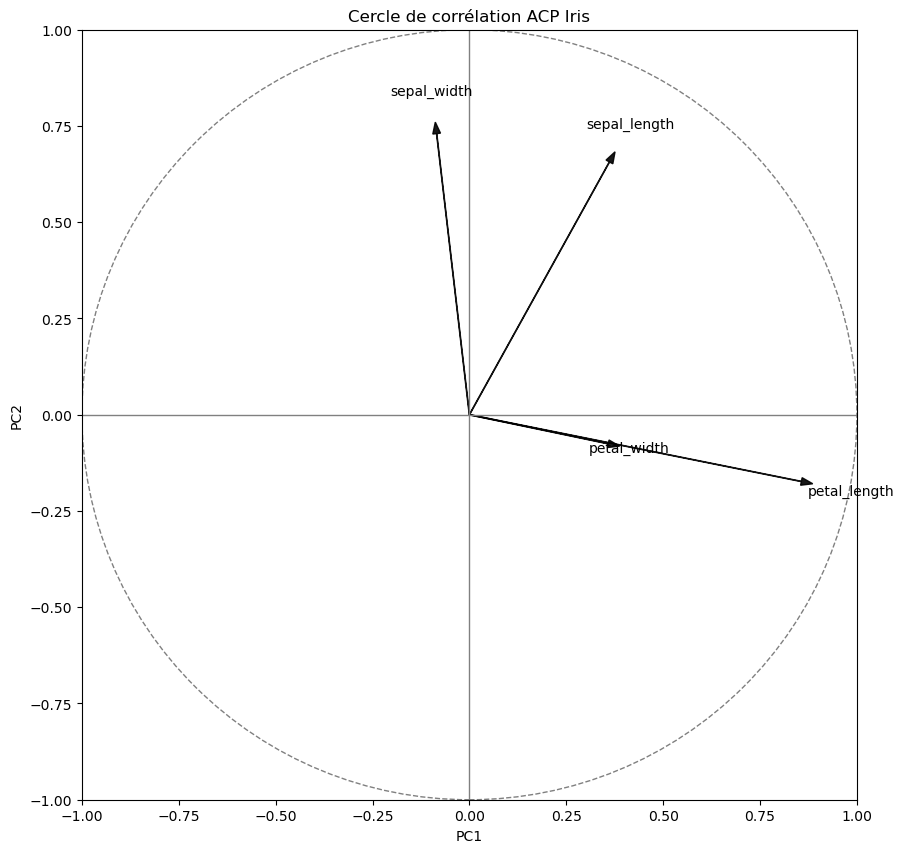

In [199]:
# Creer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, features_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP Iris')

# Afficher la figure
plt.show()

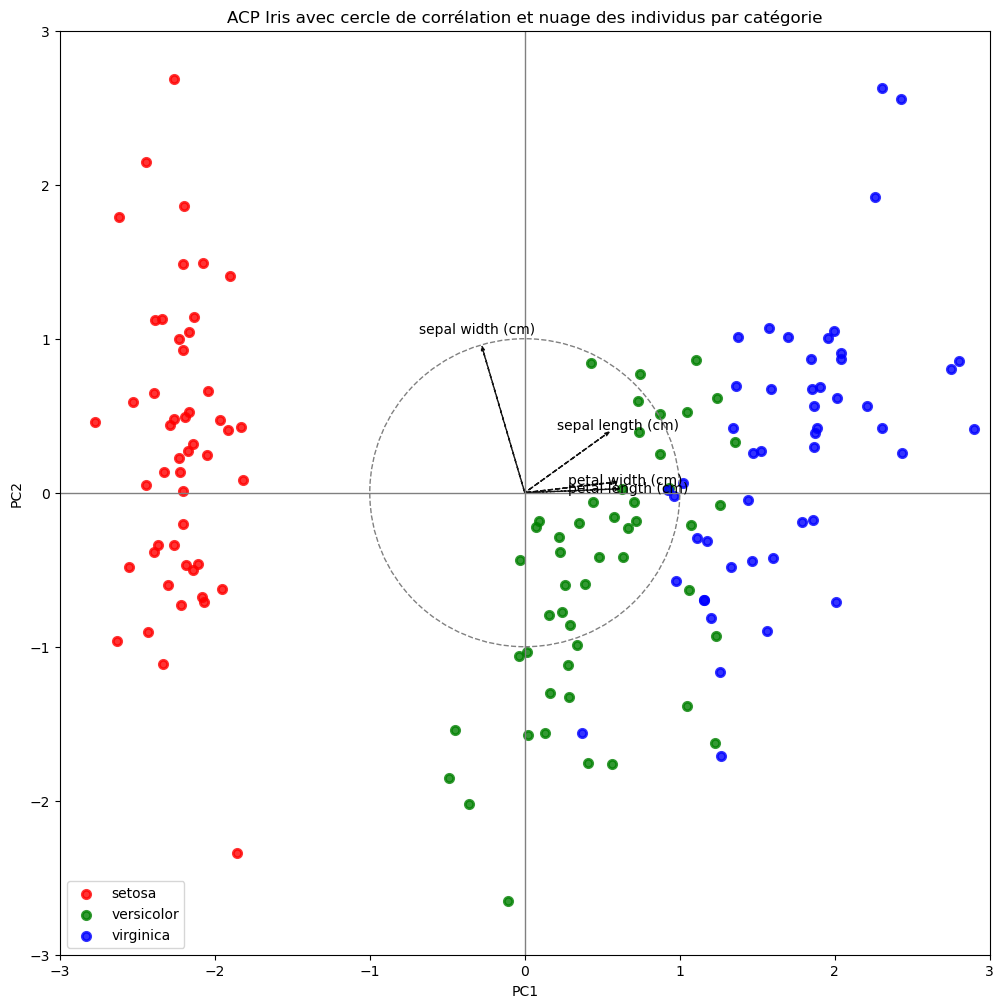

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Charger les données Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories d'espèces avec les couleurs
colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP Iris avec cercle de corrélation et nuage des individus par catégorie')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()